In [1]:
# Load the Data
import numpy as np
import pandas as pd

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [4]:
Team1vsTeam2 = pd.read_excel(r'Team1vsTeam2_2019-2023.xlsx')
df = Team1vsTeam2
df

,index,WR,KD,CKPM,GPR,GSPD,EGR,MLR,FB,FT,...,HLD,FD,DRG,ELD,BN,LNE,JNG,WPM,CWPM,IsWin
0,T1,0.119447,0.13,-0.02,0.37,0.014,1.1,10.9,-0.01,0.05,...,0.02,0.05,0.03,0.25,0.11,-0.003,-0.004,0.23,0.03,1
1,Cloud9,0.196685,0.35,-0.18,0.33,0.045,4.0,15.2,0.00,-0.07,...,0.12,0.10,0.06,0.00,0.10,-0.001,0.027,0.26,-0.05,1
2,Gen.G,0.030134,0.25,-0.23,0.27,0.025,7.0,-4.0,0.15,0.12,...,-0.05,-0.05,0.00,-0.40,0.01,0.002,0.019,-0.02,-0.17,1
3,Team BDS,-0.236601,-0.55,-0.05,-1.07,-0.089,-9.7,-16.2,0.01,-0.07,...,-0.03,0.05,-0.04,0.64,-0.08,-0.012,-0.058,-0.22,-0.17,0
4,G2 Esports,0.099203,0.01,0.35,0.27,0.030,-0.4,10.4,-0.10,0.08,...,0.10,-0.02,-0.03,0.56,0.06,0.001,0.017,-0.25,-0.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,J Team,-0.109790,-0.30,-0.20,-0.47,-0.027,-5.8,-5.7,-0.12,-0.09,...,-0.05,-0.11,-0.07,-0.09,-0.08,0.000,-0.024,0.26,0.12,1
364,Dplus KIA,-0.070833,-0.09,-0.02,-0.10,0.019,-7.0,-0.1,-0.15,-0.03,...,0.04,-0.11,-0.02,-0.44,0.01,0.001,0.019,0.56,0.30,0
365,Invictus Gaming,0.103757,-0.03,0.38,0.17,0.022,1.5,9.5,-0.23,0.04,...,-0.10,-0.11,-0.05,0.03,0.10,0.016,0.039,-0.54,-0.28,1
366,Royal Never Give Up,0.177327,0.30,0.12,0.60,0.019,8.0,11.2,0.03,-0.01,...,-0.10,0.16,0.07,0.51,0.09,-0.001,0.000,0.06,-0.10,1


In [5]:
df.IsWin.value_counts()
df.describe()

,WR,KD,CKPM,GPR,GSPD,EGR,MLR,FB,FT,F3T,HLD,FD,DRG,ELD,BN,LNE,JNG,WPM,CWPM,IsWin
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,0.005476,0.011848,0.002174,0.021630,0.001641,0.260598,0.409511,0.001929,0.001168,0.002255,0.002717,0.005272,0.003505,0.011114,0.002935,0.000033,0.001590,0.007527,-0.005516,0.519022
std,0.112255,0.268764,0.158620,0.527456,0.039215,7.766588,10.058686,0.103725,0.123330,0.128150,0.128543,0.123945,0.076500,0.349521,0.100566,0.006580,0.023699,0.359765,0.212638,0.500318
min,-0.293907,-0.940000,-0.430000,-1.640000,-0.125000,-18.500000,-31.900000,-0.320000,-0.350000,-0.450000,-0.340000,-0.350000,-0.200000,-1.000000,-0.260000,-0.020000,-0.058000,-1.110000,-0.570000,0.000000
25%,-0.078084,-0.170000,-0.110000,-0.330000,-0.024250,-5.825000,-6.800000,-0.070000,-0.080000,-0.080000,-0.090000,-0.090000,-0.050000,-0.140000,-0.080000,-0.004000,-0.016000,-0.240000,-0.150000,0.000000
50%,0.007489,0.020000,-0.010000,0.065000,0.002500,0.300000,0.400000,0.000000,-0.010000,0.000000,0.000000,0.010000,0.005000,0.000000,0.000000,0.000000,0.003000,0.020000,-0.010000,1.000000
75%,0.089830,0.180000,0.110000,0.360000,0.027000,6.425000,7.450000,0.070000,0.080000,0.090000,0.100000,0.090000,0.060000,0.150000,0.080000,0.004000,0.019250,0.250000,0.140000,1.000000
max,0.279326,0.890000,0.430000,1.640000,0.125000,18.500000,30.800000,0.320000,0.350000,0.450000,0.340000,0.350000,0.200000,1.000000,0.260000,0.020000,0.057000,1.110000,0.490000,1.000000


#### Dummy Encoding
Encoding scheme to 'index' variable

In [6]:
df_enc = pd.get_dummies(df, columns = ['index'])
df_enc2 = pd.get_dummies(df, columns = ['index'], drop_first = True)

In [7]:
df_enc.info()
df_enc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   WR                          368 non-null    float64
 1   KD                          368 non-null    float64
 2   CKPM                        368 non-null    float64
 3   GPR                         368 non-null    float64
 4   GSPD                        368 non-null    float64
 5   EGR                         368 non-null    float64
 6   MLR                         368 non-null    float64
 7   FB                          368 non-null    float64
 8   FT                          368 non-null    float64
 9   F3T                         368 non-null    float64
 10  HLD                         368 non-null    float64
 11  FD                          368 non-null    float64
 12  DRG                         368 non-null    float64
 13  ELD                         368 non

,WR,KD,CKPM,GPR,GSPD,EGR,MLR,FB,FT,F3T,...,index_Splyce,index_Suning,index_T1,index_TSM,index_Team BDS,index_Team Liquid,index_Top Esports,index_Unicorns of Love.CIS,index_Weibo Gaming,index_ahq eSports Club
0,0.119447,0.13,-0.02,0.37,0.014,1.1,10.9,-0.01,0.05,0.03,...,0,0,1,0,0,0,0,0,0,0
1,0.196685,0.35,-0.18,0.33,0.045,4.0,15.2,0.00,-0.07,-0.03,...,0,0,0,0,0,0,0,0,0,0
2,0.030134,0.25,-0.23,0.27,0.025,7.0,-4.0,0.15,0.12,0.06,...,0,0,0,0,0,0,0,0,0,0
3,-0.236601,-0.55,-0.05,-1.07,-0.089,-9.7,-16.2,0.01,-0.07,-0.19,...,0,0,0,0,1,0,0,0,0,0
4,0.099203,0.01,0.35,0.27,0.030,-0.4,10.4,-0.10,0.08,0.03,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_enc2.info()
df_enc2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   WR                          368 non-null    float64
 1   KD                          368 non-null    float64
 2   CKPM                        368 non-null    float64
 3   GPR                         368 non-null    float64
 4   GSPD                        368 non-null    float64
 5   EGR                         368 non-null    float64
 6   MLR                         368 non-null    float64
 7   FB                          368 non-null    float64
 8   FT                          368 non-null    float64
 9   F3T                         368 non-null    float64
 10  HLD                         368 non-null    float64
 11  FD                          368 non-null    float64
 12  DRG                         368 non-null    float64
 13  ELD                         368 non

,WR,KD,CKPM,GPR,GSPD,EGR,MLR,FB,FT,F3T,...,index_Splyce,index_Suning,index_T1,index_TSM,index_Team BDS,index_Team Liquid,index_Top Esports,index_Unicorns of Love.CIS,index_Weibo Gaming,index_ahq eSports Club
0,0.119447,0.13,-0.02,0.37,0.014,1.1,10.9,-0.01,0.05,0.03,...,0,0,1,0,0,0,0,0,0,0
1,0.196685,0.35,-0.18,0.33,0.045,4.0,15.2,0.00,-0.07,-0.03,...,0,0,0,0,0,0,0,0,0,0
2,0.030134,0.25,-0.23,0.27,0.025,7.0,-4.0,0.15,0.12,0.06,...,0,0,0,0,0,0,0,0,0,0
3,-0.236601,-0.55,-0.05,-1.07,-0.089,-9.7,-16.2,0.01,-0.07,-0.19,...,0,0,0,0,1,0,0,0,0,0
4,0.099203,0.01,0.35,0.27,0.030,-0.4,10.4,-0.10,0.08,0.03,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X = df_enc2[['WR', 'KD', 'CKPM','GPR','GSPD','EGR','MLR','FB','FT','F3T','HLD','FD','DRG','ELD','BN','LNE','JNG','WPM','CWPM']]
Y = df_enc2[['IsWin']]

In [10]:
model = DecisionTreeClassifier()
model.fit(X,Y)

feature_importance = model.feature_importances_

feature_importance_df_enc2 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

feature_importance_df_enc2 = feature_importance_df_enc2.sort_values(by='Importance', ascending=False)

feature_importance_df_enc2.head(25)

,Feature,Importance
17,WPM,0.169474
18,CWPM,0.083759
1,KD,0.080324
2,CKPM,0.080069
13,ELD,0.070847
7,FB,0.064544
0,WR,0.061942
11,FD,0.054404
5,EGR,0.051540
10,HLD,0.051216


In [11]:
features_to_remove = ['F3T', 'LNE','GPR']
df1=df.drop(features_to_remove, axis=1)
df1

,index,WR,KD,CKPM,GSPD,EGR,MLR,FB,FT,HLD,FD,DRG,ELD,BN,JNG,WPM,CWPM,IsWin
0,T1,0.119447,0.13,-0.02,0.014,1.1,10.9,-0.01,0.05,0.02,0.05,0.03,0.25,0.11,-0.004,0.23,0.03,1
1,Cloud9,0.196685,0.35,-0.18,0.045,4.0,15.2,0.00,-0.07,0.12,0.10,0.06,0.00,0.10,0.027,0.26,-0.05,1
2,Gen.G,0.030134,0.25,-0.23,0.025,7.0,-4.0,0.15,0.12,-0.05,-0.05,0.00,-0.40,0.01,0.019,-0.02,-0.17,1
3,Team BDS,-0.236601,-0.55,-0.05,-0.089,-9.7,-16.2,0.01,-0.07,-0.03,0.05,-0.04,0.64,-0.08,-0.058,-0.22,-0.17,0
4,G2 Esports,0.099203,0.01,0.35,0.030,-0.4,10.4,-0.10,0.08,0.10,-0.02,-0.03,0.56,0.06,0.017,-0.25,-0.57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,J Team,-0.109790,-0.30,-0.20,-0.027,-5.8,-5.7,-0.12,-0.09,-0.05,-0.11,-0.07,-0.09,-0.08,-0.024,0.26,0.12,1
364,Dplus KIA,-0.070833,-0.09,-0.02,0.019,-7.0,-0.1,-0.15,-0.03,0.04,-0.11,-0.02,-0.44,0.01,0.019,0.56,0.30,0
365,Invictus Gaming,0.103757,-0.03,0.38,0.022,1.5,9.5,-0.23,0.04,-0.10,-0.11,-0.05,0.03,0.10,0.039,-0.54,-0.28,1
366,Royal Never Give Up,0.177327,0.30,0.12,0.019,8.0,11.2,0.03,-0.01,-0.10,0.16,0.07,0.51,0.09,0.000,0.06,-0.10,1


In [12]:
X = df1[['WR','KD','CKPM','GSPD','EGR','MLR','FT','FB','HLD','FD','DRG','ELD','BN','JNG','WPM','CWPM']]

Y = df1[['IsWin']]

In [13]:
# Split Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42,)
X_train.shape, X_test.shape

((257, 16), (111, 16))

In [14]:
# BASELINE
negative = np.sum(Y_train == 0)
positive = np.sum(Y_train == 1)
print(pd.Series({'0': negative, '1': positive}))

0    IsWin    128
dtype: int64
1    IsWin    129
dtype: int64
dtype: object


In [15]:
dtc = DecisionTreeClassifier(min_samples_leaf=5,ccp_alpha=0.003,random_state =88)

dtc = dtc.fit(X_train, Y_train)

Node count = 53


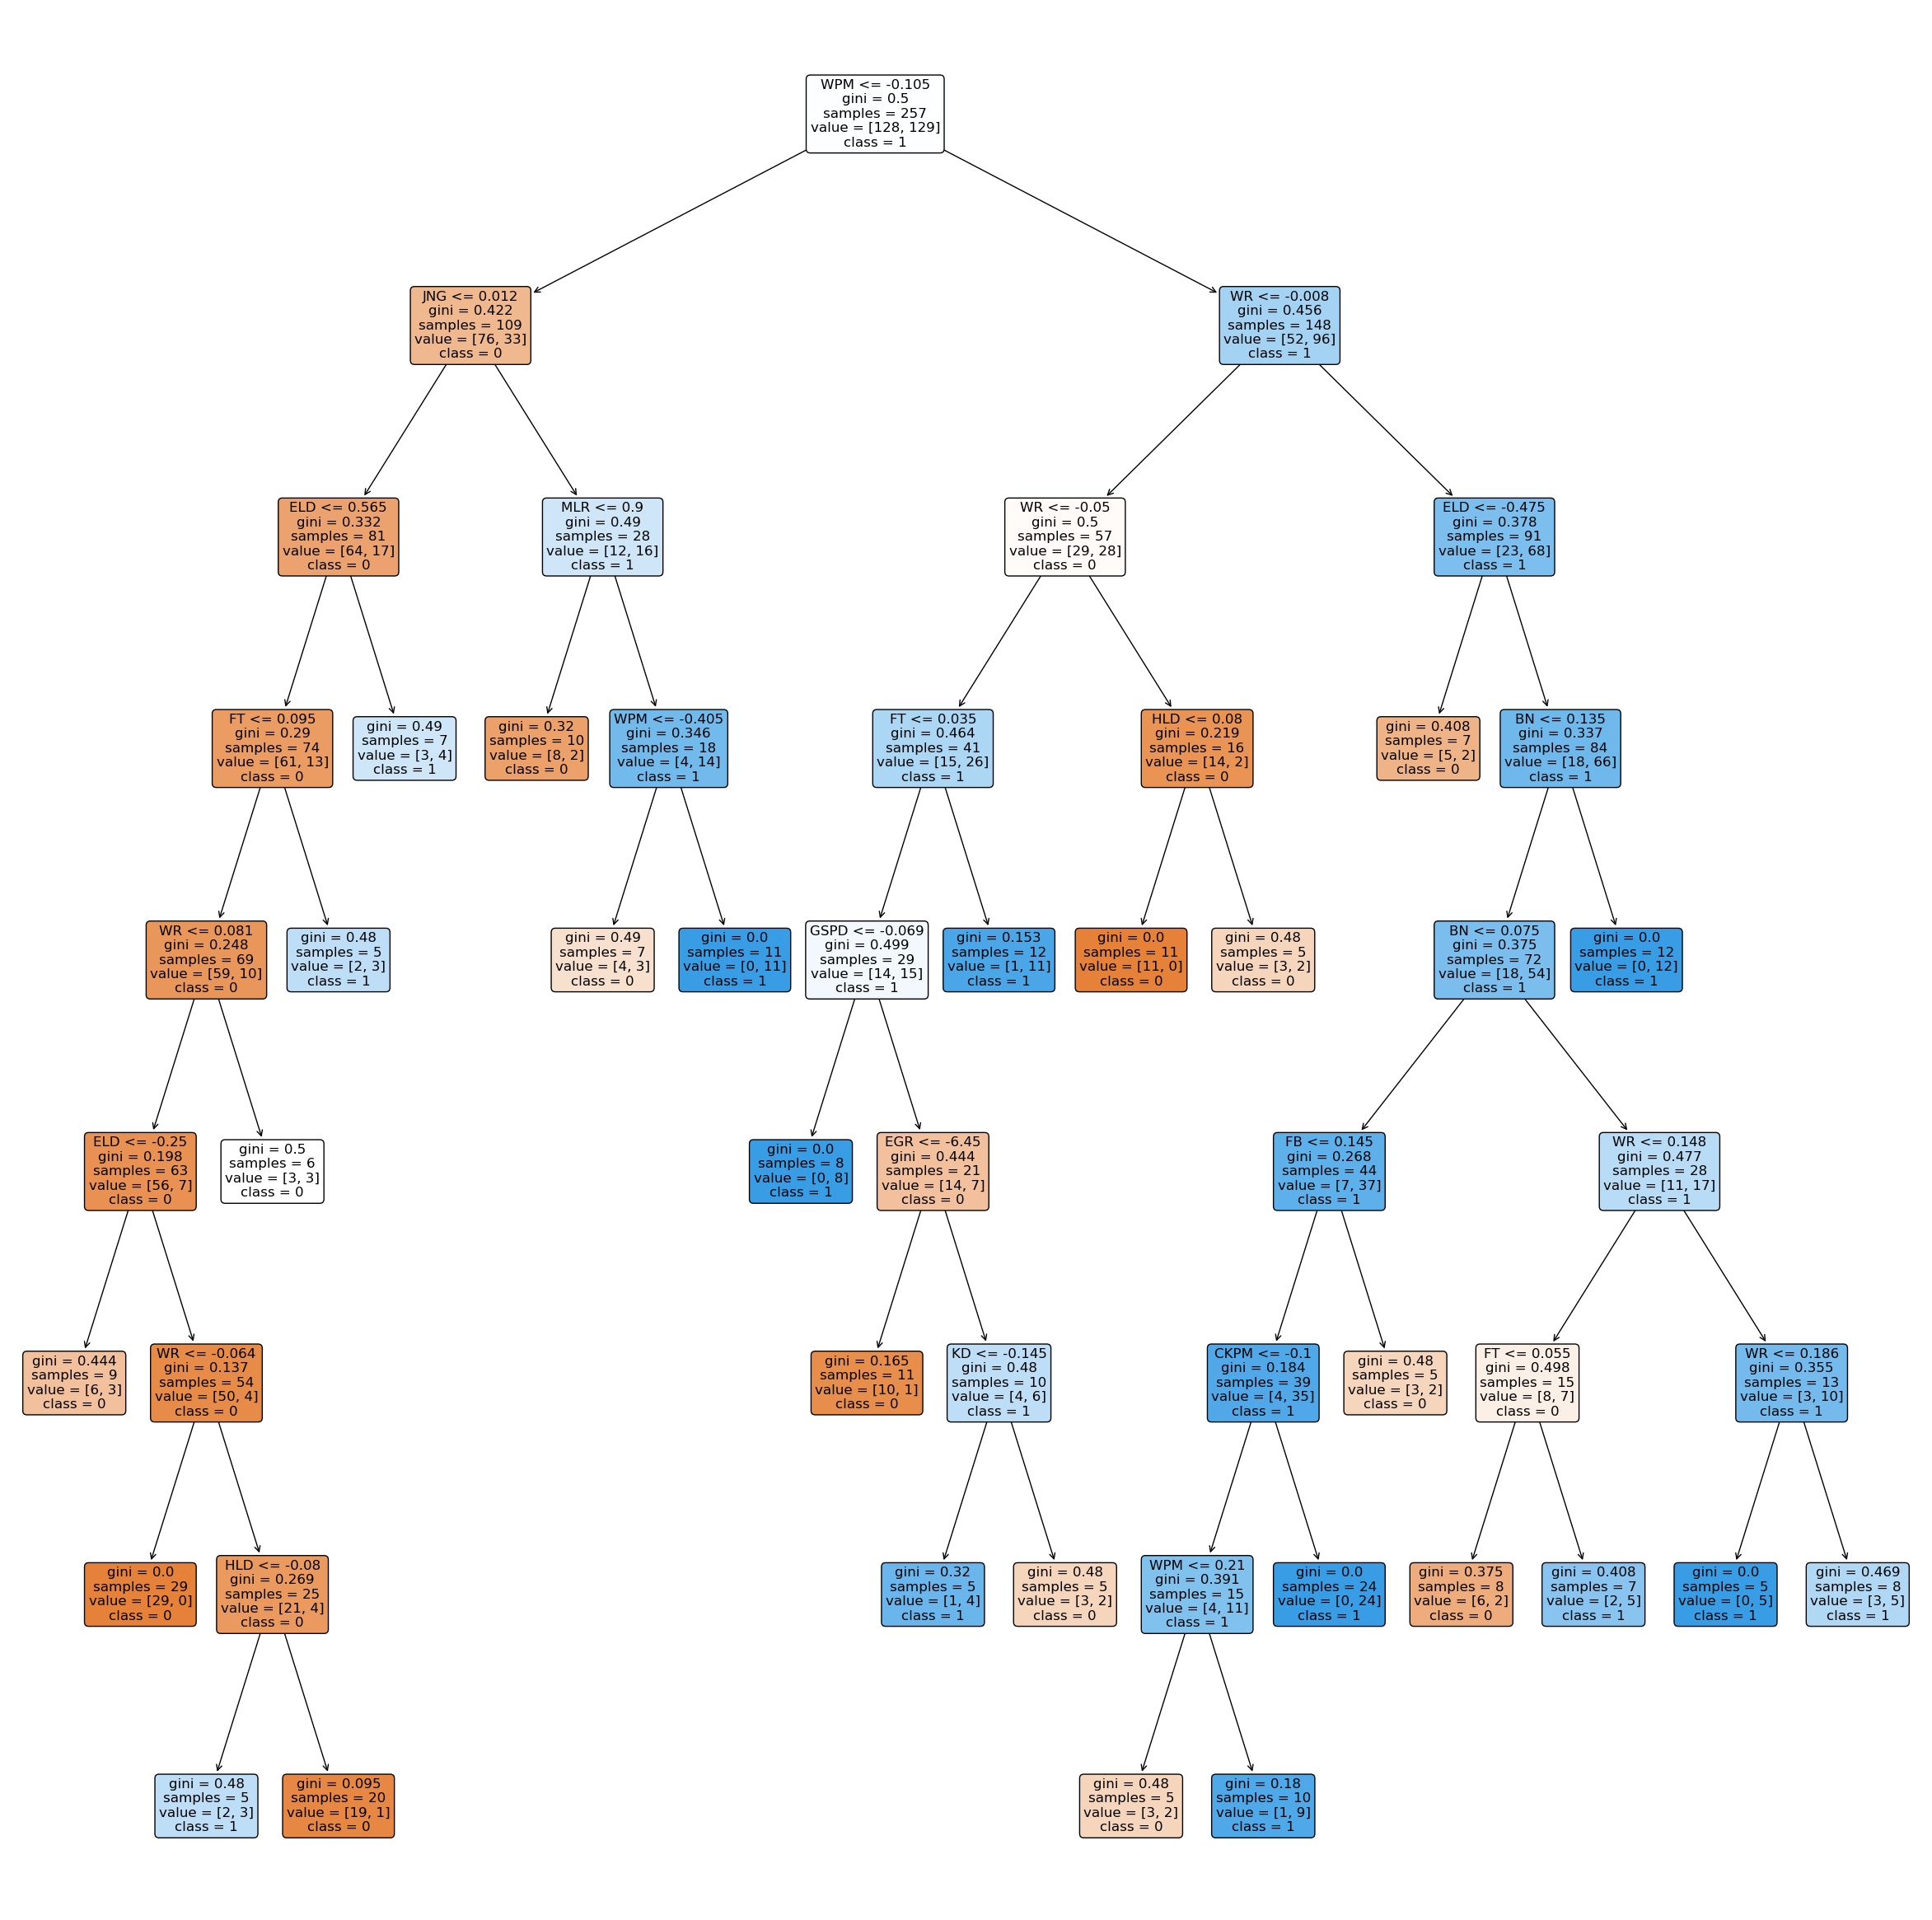

In [16]:
print('Node count =', dtc.tree_.node_count)
plt.figure(figsize=(30,30))
plot_tree(dtc, 
          feature_names=list(X_train.columns),          
          class_names=['0','1'], 
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12) 
plt.show()

In [17]:
# MAKE PREDICTIONS 
Y_pred = dtc.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
Y_proba = dtc.predict_proba(X_test)
print ("Confusion Matrix : \n", cm)
print('Precision:',precision_score(Y_test, Y_pred))
print('Recall:',recall_score(Y_test, Y_pred))
print('Accuracy:',accuracy_score(Y_test, Y_pred))
display(Y_proba)

Confusion Matrix : 
 [[24 25]
 [27 35]]
Precision: 0.5833333333333334
Recall: 0.5645161290322581
Accuracy: 0.5315315315315315


array([[0.        , 1.        ],
       [0.42857143, 0.57142857],
       [0.2       , 0.8       ],
       [1.        , 0.        ],
       [0.1       , 0.9       ],
       [0.90909091, 0.09090909],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.375     , 0.625     ],
       [0.6       , 0.4       ],
       [0.6       , 0.4       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.95      , 0.05      ],
       [0.        , 1.        ],
       [0.75      , 0.25      ],
       [0.        , 1.        ],
       [0.6       , 0.4       ],
       [0.2       , 0.8       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.1       , 0.9       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.28571429, 0.71428571],
       [0.2       , 0.8       ],
       [0.75      , 0.25      ],
       [1.        , 0.        ],
       [0.90909091, 0.09090909],
       [0.

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{0: 1, 1: 20}],
               'random_state': [88]}

            
dtc3 = DecisionTreeClassifier()

cv = KFold(n_splits=5,random_state=1,shuffle=True) 

dtc3_cv_acc = GridSearchCV(dtc3, param_grid = grid_values, scoring = 'accuracy', cv=cv, verbose=1) 

dtc3_cv_acc.fit(X_train, Y_train)

Fitting 5 folds for each of 201 candidates, totalling 1005 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017...
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'class_weight': [{0: 1, 1: 20}], 'max_depth': [30],
                         'min_samples_leaf': [5], 'min_samples_split': [20],
                         'random_state': [88]},
             scoring='accuracy', verbose=1)

In [28]:
acc3 = dtc3_cv_acc.cv_results_['mean_test_score'] 
ccp3 = dtc3_cv_acc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp3, 'Validation Accuracy': acc3}).head(20)

,ccp alpha,Validation Accuracy
0,0.0,0.564404
1,0.0005,0.564404
2,0.001,0.564404
3,0.0015,0.564404
4,0.002,0.560558
5,0.0025,0.549020
6,0.003,0.541403
7,0.0035,0.541403
8,0.004,0.545249
9,0.0045,0.514253


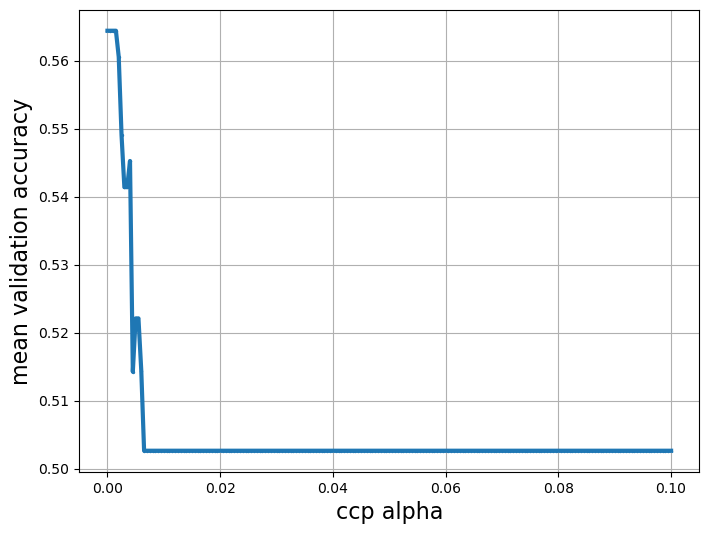

In [29]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp3, acc3, s=2)
plt.plot(ccp3, acc3, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [30]:
print('Grid best parameter ccp_alpha (max. accuracy): ', dtc3_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc3_cv_acc.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.0
Grid best score (accuracy):  0.5644042232277526


Node count = 51


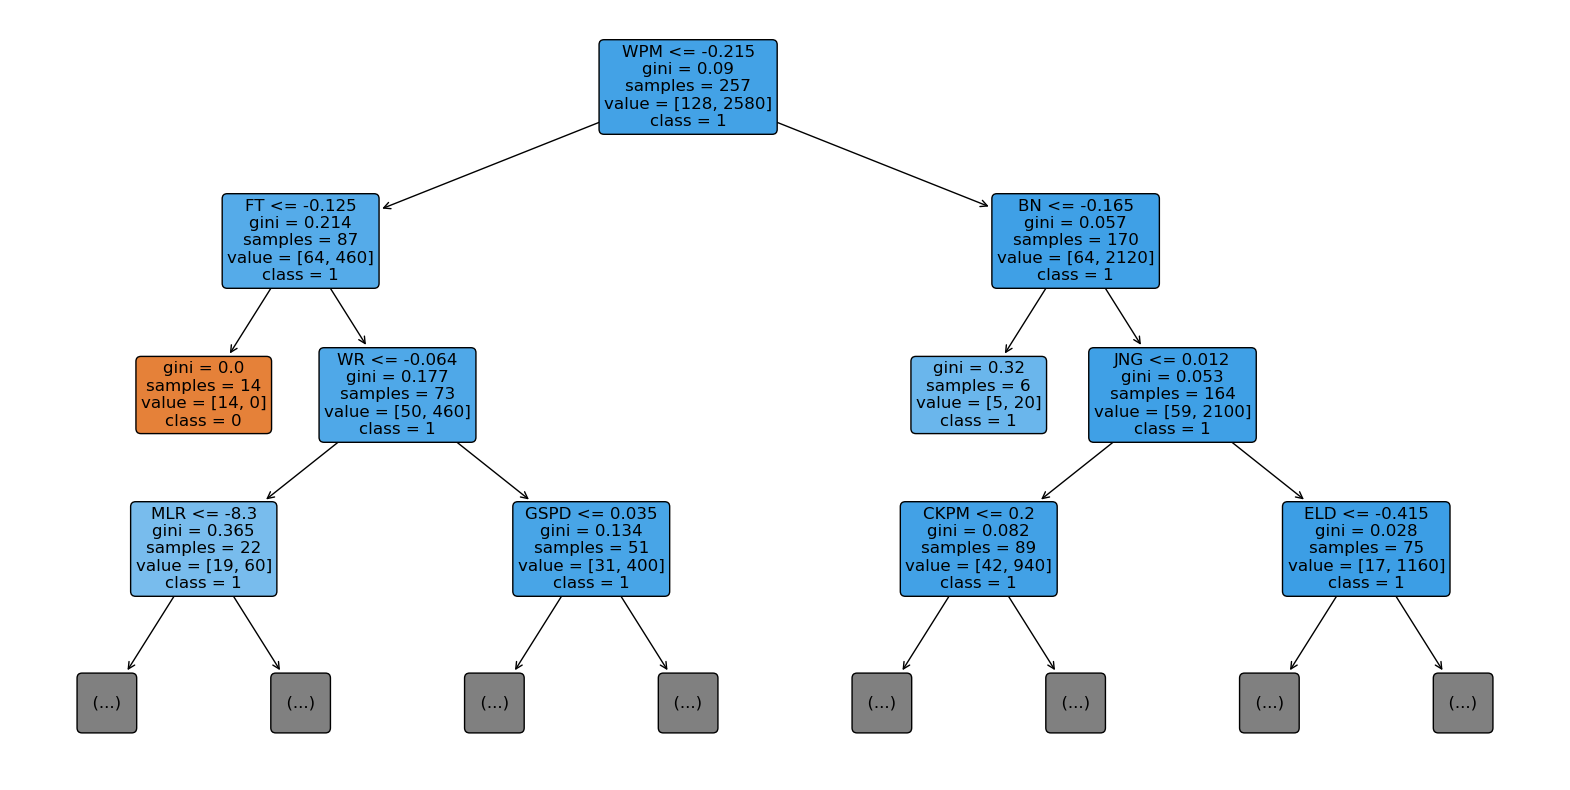

In [31]:
print('Node count =', dtc3_cv_acc.best_estimator_.tree_.node_count)

plt.figure(figsize=(20,10))
plot_tree(dtc3_cv_acc.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=True,
          rounded=True,
          fontsize=12,
          max_depth=3)
plt.show()

In [32]:
import numpy as np
# MAKE PREDICTIONS 
Y_pred = dtc3_cv_acc.best_estimator_.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
Y_proba = dtc3_cv_acc.best_estimator_.predict_proba(X_test)
print("Confusion Matrix : \n", cm)
print('Precision:',precision_score(Y_test, Y_pred))
print('Recall:',recall_score(Y_test, Y_pred))
print('Accuracy:',accuracy_score(Y_test, Y_pred))

Confusion Matrix : 
 [[ 5 44]
 [ 3 59]]
Precision: 0.5728155339805825
Recall: 0.9516129032258065
Accuracy: 0.5765765765765766


In [33]:
display(Y_proba)

array([[0.        , 1.        ],
       [0.09090909, 0.90909091],
       [0.01639344, 0.98360656],
       [1.        , 0.        ],
       [0.04761905, 0.95238095],
       [0.03225806, 0.96774194],
       [0.01639344, 0.98360656],
       [0.07692308, 0.92307692],
       [0.04761905, 0.95238095],
       [0.04761905, 0.95238095],
       [0.11111111, 0.88888889],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.06976744, 0.93023256],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.04761905, 0.95238095],
       [0.01639344, 0.98360656],
       [0.16666667, 0.83333333],
       [0.01639344, 0.98360656],
       [0.01639344, 0.98360656],
       [0.        , 1.        ],
       [0.01639344, 0.98360656],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.04761905, 0.95238095],
       [1.        , 0.        ],
       [0.07692308, 0.92307692],
       [0.

## Predict the Winner
### 8-in-4

In [34]:
year2023StatForWorldsTeam = pd.read_excel(r'year2023StatForWorldsTeam(1).xlsx') 
year2023StatForWorldsTeam.set_index("team", inplace = True)
year2023StatForWorldsTeam.rename(columns={"win rate": "WR"}, inplace=True)

selected_columns = year2023StatForWorldsTeam[['WR','KD','CKPM','GSPD','EGR','MLR','FT','FB','HLD','FD','DRG','ELD','BN','JNG','WPM','CWPM']]
selected_columns

,WR,KD,CKPM,GSPD,EGR,MLR,FT,FB,HLD,FD,DRG,ELD,BN,JNG,WPM,CWPM
team,,,,,,,,,,,,,,,,
Gen.G,0.726562,1.53,0.75,0.075,60.8,11.9,0.66,0.61,0.53,0.44,0.59,0.60,0.64,0.550,3.13,1.21
T1,0.611511,1.10,0.77,0.040,59.8,1.4,0.72,0.51,0.61,0.61,0.58,0.50,0.61,0.514,3.32,1.40
KT Rolster,0.694215,1.52,0.69,0.045,57.5,11.9,0.61,0.55,0.45,0.55,0.60,0.73,0.62,0.505,3.19,1.37
Dplus KIA,0.606061,1.35,0.67,0.039,60.5,0.1,0.53,0.58,0.54,0.62,0.62,0.44,0.57,0.522,3.40,1.52
JD Gaming,0.777778,1.58,0.86,0.083,58.5,21.5,0.55,0.52,0.43,0.50,0.60,0.00,0.64,0.553,3.31,1.25
Bilibili Gaming,0.641379,1.21,0.91,0.053,58.7,6.9,0.52,0.57,0.48,0.59,0.56,0.00,0.59,0.531,3.32,1.32
LNG Esports,0.651786,1.39,0.81,0.045,61.4,-1.4,0.40,0.61,0.60,0.60,0.54,0.00,0.58,0.505,3.14,1.34
Weibo Gaming,0.607843,1.18,0.82,0.044,52.3,-18.9,0.67,0.45,0.50,0.67,0.51,0.00,0.59,0.520,3.21,1.39
G2 Esports,0.705263,1.36,1.02,0.069,60.1,10.5,0.61,0.48,0.64,0.60,0.59,1.00,0.63,0.539,3.15,0.95


In [19]:
# GenG in Blue
GenG_vs_BLG = selected_columns.loc[["Gen.G"]].sub(selected_columns.loc[["Bilibili Gaming"]].squeeze())
# BlG in Blue
BLG_vs_GenG = selected_columns.loc[["Bilibili Gaming"]].sub(selected_columns.loc[["Gen.G"]].squeeze())

In [35]:
# Predict the Winning Rate
GenG_WR = dtc3_cv_acc.best_estimator_.predict_proba(GenG_vs_BLG)
BLG_WR = dtc3_cv_acc.best_estimator_.predict_proba(BLG_vs_GenG)
print('The Winning Rate for Gen.G in the blue side is ', GenG_WR, 
      '; the Winning Rate for BLG in the blue side is ', BLG_WR)

The Winning Rate for Gen.G in the blue side is  [[0. 1.]] ; the Winning Rate for BLG in the blue side is  [[0. 1.]]


##### GenG vs BLG: 1 to 1

In [37]:
# NRG in Blue
NRG_vs_WBG = selected_columns.loc[["NRG"]].sub(selected_columns.loc[["Weibo Gaming"]].squeeze())
# WBG in Blue
WBG_vs_NRG = selected_columns.loc[["Weibo Gaming"]].sub(selected_columns.loc[["NRG"]].squeeze())

# Predict the Winning Rate
NRG_WR = dtc3_cv_acc.best_estimator_.predict_proba(NRG_vs_WBG)
WBG_WR = dtc3_cv_acc.best_estimator_.predict_proba(WBG_vs_NRG)


print('The Winning Rate for NRG in the blue side is ', NRG_WR, '; the Winning Rate for WBG in the blue side is ', WBG_WR)

The Winning Rate for NRG in the blue side is  [[0. 1.]] ; the Winning Rate for WBG in the blue side is  [[0.33333333 0.66666667]]


##### NRG win

In [39]:
# JDG in Blue
JDG_vs_KT = selected_columns.loc[["JD Gaming"]].sub(selected_columns.loc[["KT Rolster"]].squeeze())
# KT in Blue
KT_vs_JDG = selected_columns.loc[["KT Rolster"]].sub(selected_columns.loc[["JD Gaming"]].squeeze())

# Predict the Winning Rate
JDG_WR = dtc3_cv_acc.best_estimator_.predict_proba(JDG_vs_KT)
KT_WR = dtc3_cv_acc.best_estimator_.predict_proba(KT_vs_JDG)

print('The Winning Rate for JDG in the blue side is ', JDG_WR, '; the Winning Rate for KT in the blue side is ', KT_WR)

The Winning Rate for JDG in the blue side is  [[0.07692308 0.92307692]] ; the Winning Rate for KT in the blue side is  [[0. 1.]]


##### KT win

In [40]:
# LNG in Blue
LNG_vs_T1 = selected_columns.loc[["LNG Esports"]].sub(selected_columns.loc[["T1"]].squeeze())
# T1 in Blue
T1_vs_LNG = selected_columns.loc[["T1"]].sub(selected_columns.loc[["LNG Esports"]].squeeze())

# Predict the Winning Rate
LNG_WR = dtc3_cv_acc.best_estimator_.predict_proba(LNG_vs_T1)
T1_WR = dtc3_cv_acc.best_estimator_.predict_proba(T1_vs_LNG)
print('The Winning Rate for LNG in the blue side is ', LNG_WR, '; the Winning Rate for T1 in the blue side is ', T1_WR)

The Winning Rate for LNG in the blue side is  [[0. 1.]] ; the Winning Rate for T1 in the blue side is  [[0.11111111 0.88888889]]


##### LNG win

### Semifinals

In [47]:
# GenG in Blue
GenG_vs_NRG = selected_columns.loc[["Gen.G"]].sub(selected_columns.loc[["NRG"]].squeeze())
# WBG in Blue
NRG_vs_GenG = selected_columns.loc[["NRG"]].sub(selected_columns.loc[["Gen.G"]].squeeze())
# Predict the Winning Rate
GenG_WR = dtc3_cv_acc.best_estimator_.predict_proba(GenG_vs_NRG)
NRG_WR = dtc3_cv_acc.best_estimator_.predict_proba(NRG_vs_GenG)
print('The Winning Rate for GenG in the blue side is ', GenG_WR, 
      '; the Winning Rate for NRG in the blue side is ', NRG_WR)

The Winning Rate for GenG in the blue side is  [[0.33333333 0.66666667]] ; the Winning Rate for NRG in the blue side is  [[0.03225806 0.96774194]]


In [49]:
# GenG in Blue
BLG_vs_NRG = selected_columns.loc[["Bilibili Gaming"]].sub(selected_columns.loc[["NRG"]].squeeze())
# WBG in Blue
NRG_vs_BLG = selected_columns.loc[["NRG"]].sub(selected_columns.loc[["Bilibili Gaming"]].squeeze())
# Predict the Winning Rate
BLG_WR = dtc3_cv_acc.best_estimator_.predict_proba(BLG_vs_NRG)
NRG_WR = dtc3_cv_acc.best_estimator_.predict_proba(NRG_vs_BLG)
print('The Winning Rate for GenG in the blue side is ', BLG_WR, 
      '; the Winning Rate for NRG in the blue side is ', NRG_WR)

The Winning Rate for GenG in the blue side is  [[0.33333333 0.66666667]] ; the Winning Rate for NRG in the blue side is  [[0. 1.]]


##### NRG win

In [43]:
# KT in Blue
KT_vs_JDG = selected_columns.loc[["KT Rolster"]].sub(selected_columns.loc[["JD Gaming"]].squeeze())
# LNG in Blue
LNG_vs_T1 = selected_columns.loc[["LNG Esports"]].sub(selected_columns.loc[["T1"]].squeeze())

# Predict the Winning Rate
KT_WR = dtc3_cv_acc.best_estimator_.predict_proba(KT_vs_JDG)
LNG_WR = dtc3_cv_acc.best_estimator_.predict_proba(LNG_vs_T1)
print('The Winning Rate for KT in the blue side is ', KT_WR, 
      '; the Winning Rate for LNG in the blue side is ', LNG_WR)

The Winning Rate for KT in the blue side is  [[0. 1.]] ; the Winning Rate for LNG in the blue side is  [[0. 1.]]


##### KT VS LNG: 1 to 1

### Final

In [53]:
# NRG in Blue
NRG_vs_KT = selected_columns.loc[["NRG"]].sub(selected_columns.loc[["KT Rolster"]].squeeze())
# KT in Blue
KT_vs_NRG = selected_columns.loc[["KT Rolster"]].sub(selected_columns.loc[["NRG"]].squeeze())

# Predict the Winning Rate
NRG_WR = dtc3_cv_acc.best_estimator_.predict_proba(NRG_vs_KT)
KT_WR = dtc3_cv_acc.best_estimator_.predict_proba(KT_vs_NRG)
print('The Winning Rate for NRG in the blue side is ',NRG_WR, 
      '; the Winning Rate for KT in the blue side is ', KT_WR)

The Winning Rate for NRG in the blue side is  [[0. 1.]] ; the Winning Rate for KT in the blue side is  [[0.33333333 0.66666667]]


In [52]:
# NRG  in Blue
NRG_vs_LNG = selected_columns.loc[["NRG"]].sub(selected_columns.loc[["LNG Esports"]].squeeze())
# LNG in Blue
LNG_vs_NRG = selected_columns.loc[["LNG Esports"]].sub(selected_columns.loc[["NRG"]].squeeze())

# Predict the Winning Rate
NRG_WR = dtc3_cv_acc.best_estimator_.predict_proba(NRG_vs_LNG)
LNG_WR = dtc3_cv_acc.best_estimator_.predict_proba(LNG_vs_NRG)
print('The Winning Rate for NRG in the blue side is ', NRG_WR, 
      '; the Winning Rate for KT in the blue side is ', LNG_WR)

The Winning Rate for NRG in the blue side is  [[0. 1.]] ; the Winning Rate for KT in the blue side is  [[0.33333333 0.66666667]]


##### NRG win